**Tugas Besar Pemrograman Mata Kuliah Kecerdasan Artifisial**


---


Kelompok: 1M2W

Anggota:
1. Riodino Raihan - 1301220413
2. Nurul Izzah Abdussalam Zahra - 1301223385
3. Awanda Puspa Larasati - 1301223101


---


Pada tugas besar mata kuliah Kecerdasan Artifisial ini, kami memilih dataset "**Wholesale customers**" sebagai bahan analisis. Dataset ini merujuk pada data pembelian klien dari sebuah distributor grosir. Dataset ini mencakup pengeluaran tahunan dalam monetary units (m.u.) untuk berbagai kategori produk.

Adapun variabel-variabel feature pada dataset ini yaitu:
1. Region (Categorical)
2. Fresh (Integer)
3. Milk (Integer)
4. Grocery (Integer)
5. Frozen (Integer)
6. Detergents_Paper (Integer)
7. Delicassen (Integer)

Variabel target dari dataset ini yaitu variabel **Channel** (Categorical) dan kami akan melakukan **klasifikasi** menggunakan variabel feature yang ada dengan menggunakan metode KNN dan Naive Bayes. Setiap variabel categorical sudah dilakukan Label Encoding.

# **Data Preparation**

## Import library untuk data preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

## Import dataset
 (https://www.kaggle.com/datasets/saurabhbadole/wholesale-customers-data/data )

In [ ]:
url = 'https://raw.githubusercontent.com/hyejrkv/datasetWholesaleCustomers/refs/heads/main/Wholesale%20customers%20data.csv'
dataset = pd.read_csv(url)

# **Data Exploration**

## Menampilkan banyak dataset, head dataset, dan jenis dari tiap feature



In [ ]:
print("Banyak dataset: ", len(dataset))
print()
print(dataset.head())
print()
print(dataset.nunique())

Banyak dataset:  440

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


## Memeriksa nilai yang hilang

---
Dataset ini tidak memiliki missing values.


In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


# **Data Preprocessing & Splitting**

## Korelasi antar-feature

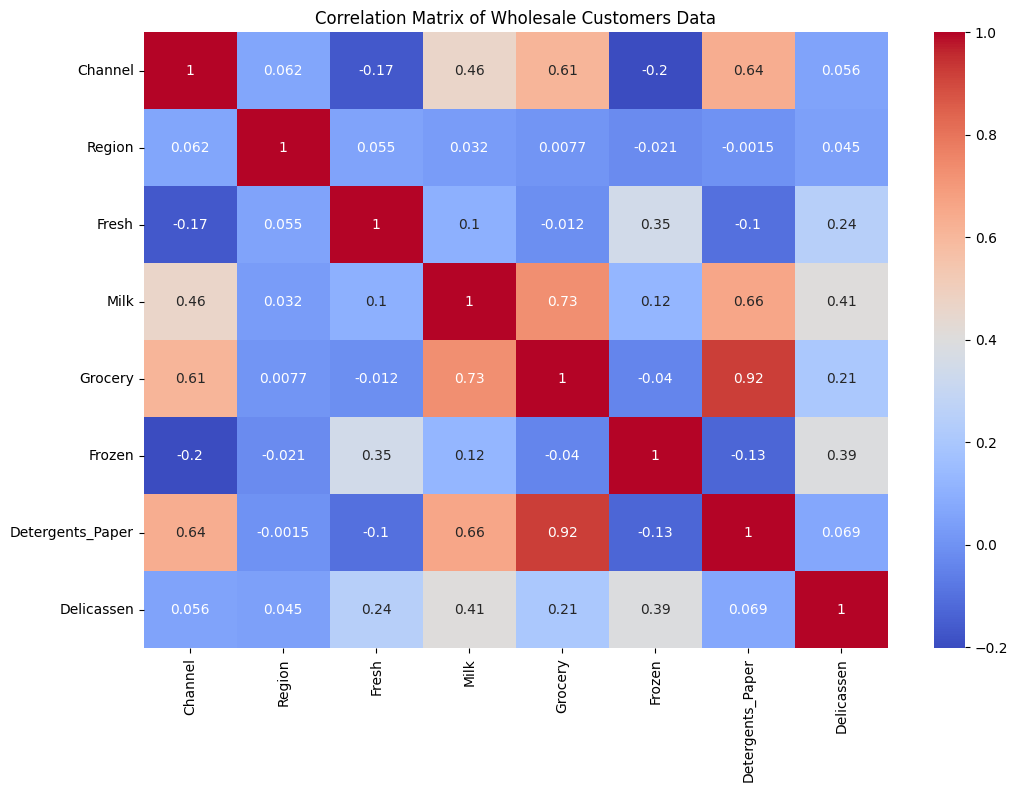


Correlation of features with target variable (Region):
Region              1.000000
Channel             0.062028
Fresh               0.055287
Delicassen          0.045212
Milk                0.032288
Grocery             0.007696
Detergents_Paper   -0.001483
Frozen             -0.021044
Name: Region, dtype: float64


In [ ]:
# Menghitung matriks korelasi
correlation_matrix = dataset.corr()
# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wholesale Customers Data')
plt.show()
# Melihat korelasi antara fitur dengan target variabel
correlation_with_target = correlation_matrix['Region'].sort_values(ascending=False)
print("\nCorrelation of features with target variable (Region):")
print(correlation_with_target)

## Memisahkan data menjadi X dan Y

In [ ]:
# Fitur yang akan dihapus
# features_to_drop = ['Fresh', 'Frozen', 'Delicassen']

# Menghapus fitur yang tidak perlu
X = dataset.drop(columns=['Channel', 'Delicassen'])
Y = dataset['Channel']

print("\nFeatures included in the model:")
print(X.columns)

# Menampilkan 5 baris pertama dari x dan y agar memastikan data mereka terpisah dengan benar.
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few rows of Y:")
print(Y.head())


Features included in the model:
Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'], dtype='object')

First few rows of X:
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper
0       3  12669  9656     7561     214              2674
1       3   7057  9810     9568    1762              3293
2       3   6353  8808     7684    2405              3516
3       3  13265  1196     4221    6404               507
4       3  22615  5410     7198    3915              1777

First few rows of Y:
0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi set pelatihan dan set pengujian
data_split_ratio = 0.2  # 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=data_split_ratio, random_state=42)

# Menampilkan ukuran setiap set
print("\nSize of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of Y_train:", y_train.shape)
print("Size of Y_test:", y_test.shape)

# Display beberapa baris pertama untuk memastikan data dipisahkan dengan benar
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of Y_train:")
print(y_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

print("\nFirst few rows of Y_test:")
print(y_test.head())


Size of X_train: (352, 6)
Size of X_test: (88, 6)
Size of Y_train: (352,)
Size of Y_test: (88,)

First few rows of X_train:
     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper
266       1    572   9763    22182    2221              4882
294       2  21273   2013     6550     909               811
31        3   2612   4339     3133    2088               820
84        3  11867   3327     4814    1178              3837
301       2   5283  13316    20399    1809              8752

First few rows of Y_train:
266    2
294    1
31     1
84     2
301    2
Name: Channel, dtype: int64

First few rows of X_test:
     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper
265       1   5909  23527    13699   10155               830
78        3  10766   1175     2067    2096               301
347       3  27380   7184    12311    2809              4621
255       1  31614    489     1495    3242               111
327       2    542    899     1664     414                88

First few rows

# **Feature Scaling**

---
Pada bagian ini, dilakukan penskalaan fitur sehingga mean sekitar 0 dan simpangan baku (standard deviation) sekitar 1. Dilakukan dengan menggunakan MinMaxScaler dari modul sklearn. Penskalaan fitur dilakukan agar semua fitur memiliki rentang nilai yang serupa sehingga dapat meningkatkan performa algoritma machine learning.


In [ ]:
# Init MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data pelatihan dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan transformasi data uji menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Konversi data yang telah diskalakan kembali ke datafrme untuk memudahkan pembacaan
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Tampilkan beberapa baris pertama dari data pelatihan yang telah diskalakan
print("\nBaris pertama dari X_train yang telah diskalakan:")
print(X_train_scaled_df.head())

# Tampilkan rata-rata dari data pelatihan yang telah diskalakan
print("\nRata-rata dari X_train yang telah diskalakan:")
print(X_train_scaled_df.mean())

# Tampilkan standar deviasi dari data pelatihan yang telah diskalakan
print("\nStandar deviasi dari X_train yang telah diskalakan:")
print(X_train_scaled_df.std())



Baris pertama dari X_train yang telah diskalakan:
   Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper
0     0.0  0.007464  0.131510  0.237290  0.036092          0.119513
1     0.5  0.279009  0.025904  0.068408  0.014529          0.019792
2     1.0  0.034224  0.057600  0.031492  0.033906          0.020013
3     1.0  0.155626  0.043809  0.049653  0.018950          0.093915
4     0.5  0.069260  0.179925  0.218027  0.029321          0.214310

Rata-rata dari X_train yang telah diskalakan:
Region              0.747159
Fresh               0.151109
Milk                0.078735
Grocery             0.085869
Frozen              0.047785
Detergents_Paper    0.074120
dtype: float64

Standar deviasi dari X_train yang telah diskalakan:
Region              0.399420
Fresh               0.148743
Milk                0.104775
Grocery             0.108552
Frozen              0.078163
Detergents_Paper    0.123941
dtype: float64


Menampilkan beberapa baris pertama dari X_train dan X_test untuk memastikan bahwa data telah dibagi dan dipisahkan dengan benar.

In [ ]:
print("Head of X_train: ")
print(X_train[:5])
print("\nHead of X_test: ")
print(X_test[:5])

Head of X_train: 
     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper
266       1    572   9763    22182    2221              4882
294       2  21273   2013     6550     909               811
31        3   2612   4339     3133    2088               820
84        3  11867   3327     4814    1178              3837
301       2   5283  13316    20399    1809              8752

Head of X_test: 
     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper
265       1   5909  23527    13699   10155               830
78        3  10766   1175     2067    2096               301
347       3  27380   7184    12311    2809              4621
255       1  31614    489     1495    3242               111
327       2    542    899     1664     414                88


# **Metode KNN**

## Initialize and train the KNN classifier with k=5 (default value)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize the model
knn.fit(X_train_scaled, y_train)  # Train the model

KNeighborsClassifier()

## Predict and evaluate the model with test data

In [ ]:
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report
y_pred = knn.predict(X_test_scaled)  # Predict the test set
default_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
default_classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print(default_classification_rep)
print(default_accuracy)

              precision    recall  f1-score   support

           1       0.97      0.88      0.92        65
           2       0.72      0.91      0.81        23

    accuracy                           0.89        88
   macro avg       0.85      0.89      0.86        88
weighted avg       0.90      0.89      0.89        88

0.8863636363636364


## Evaluate KNN accuracy across different k values to find optimal k value


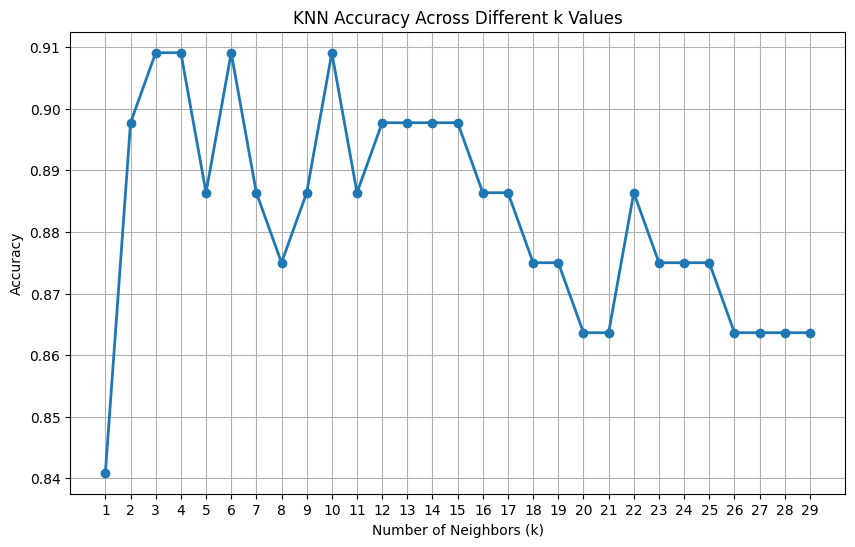

In [ ]:

k_values = range(1, 30)
accuracies = []  # Store accuracy for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_scaled, y_train)  # Train the model
    y_pred = knn.predict(X_test_scaled)  # Predict on the test set
    accuracies.append(accuracy_score(y_test, y_pred))  # Calculate and store accuracy

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Across Different k Values')
plt.grid(True)
plt.xticks(k_values)
plt.show()

## Train the model with optimal k value (k=4)

In [ ]:
optimal_k = 4
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)  # Initialize KNN with k=18
knn_optimal.fit(X_train_scaled, y_train)  # Train the model

KNeighborsClassifier(n_neighbors=4)

## Evaluate training and testing accuracy for k=4, ensures the model performs well on both sets without overfitting

In [ ]:
y_train_pred = knn_optimal.predict(X_train_scaled)  # Predict on the training set
y_test_pred = knn_optimal.predict(X_test_scaled)  # Predict on the test set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)  # Testing accuracy

##Result

---
- Kedua akurasi (training dan testing) menunjukkan nilai yang tinggi, yang menunjukkan bahwa model K-Nearest Neighbors (KNN) dengan ( k = 4 ) mampu melakukan klasifikasi dengan baik pada data pelatihan dan data pengujian.
- Perbedaan antara training accuracy dan testing accuracy sangat kecil (hanya sekitar 0.0057). Ini menunjukkan bahwa model tidak mengalami overfitting, di mana model terlalu baik pada data pelatihan tetapi buruk pada data pengujian. Sebaliknya, model ini tampaknya dapat menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.
- Nilai akurasi yang hampir sama menunjukkan bahwa model stabil dan tidak terlalu sensitif terhadap variasi dalam data. Ini adalah indikasi bahwa model dapat diandalkan untuk prediksi pada data baru.


In [ ]:
# Final results
print("Training Accuracy (k=4):", train_accuracy)
print("Testing Accuracy (k=4):", test_accuracy)

Training Accuracy (k=4): 0.9346590909090909
Testing Accuracy (k=4): 0.9090909090909091


## Tuning Hyperparameter

---
- Accuracy menurun dari sebelum dilakukan tuning, menunjukkan bahwa tuning parameter yang dilakukan mungkin tidak efektif atau tidak sesuai untuk model atau dataset yang digunakan.
- Kedua akurasi (training dan testing) menunjukkan nilai yang cukup tinggi, yang menunjukkan bahwa model mampu melakukan klasifikasi dengan baik pada data pelatihan dan data pengujian.
- Perbedaan antara training accuracy (0.9205) dan testing accuracy (0.9091) adalah sekitar 0.0114. Ini menunjukkan bahwa model tidak mengalami overfitting yang signifikan, karena akurasi pada data pengujian tidak jauh lebih rendah daripada akurasi pada data pelatihan. Model tampaknya dapat menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.
- Nilai akurasi yang relatif dekat menunjukkan bahwa model stabil dan tidak terlalu sensitif terhadap variasi dalam data. Ini adalah indikasi bahwa model dapat diandalkan untuk prediksi pada data baru.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(1, 30),  # Explore k values from 1 to 29
    'weights': ['uniform', 'distance'],  # Explore weight options
    'metric': ['euclidean', 'manhattan']  # Explore distance metrics
}

# Initialize GridSearchCV with KNN estimator and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(best_params)

# Gunakan parameter terbaik dari grid search
best_knn = KNeighborsClassifier(**grid_search.best_params_)

# Lakukan cross-validation
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5)

print("\nHasil Cross-Validation setelah Tuning:")
print(f"CV Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit model dengan parameter terbaik
best_knn.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi pada training set
y_train_pred = best_knn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
# Prediksi dan evaluasi pada test set
y_test_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nPerforma Model setelah Cross-Validation:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Hasil Cross-Validation setelah Tuning:
CV Scores: [0.94366197 0.92957746 0.88571429 0.88571429 0.91428571]
Average CV Score: 0.9118 (+/- 0.0465)

Performa Model setelah Cross-Validation:
Training Accuracy: 0.9233
Testing Accuracy: 0.8977


# **Metode Naive Bayes**

## Sebelum tuning hyperparameter

---
- Kedua akurasi (training dan testing) menunjukkan nilai yang cukup baik, dengan testing accuracy (0.9091) sedikit lebih tinggi daripada training accuracy (0.8977). Ini menunjukkan bahwa model Naive Bayes mampu melakukan klasifikasi dengan baik pada data pelatihan dan data pengujian.
- Testing accuracy yang lebih tinggi daripada training accuracy bisa menjadi indikasi bahwa model tidak mengalami overfitting. Sebaliknya, model mungkin lebih baik dalam menggeneralisasi ke data yang belum pernah dilihat sebelumnya, meskipun perbedaan antara keduanya tidak terlalu besar.
- Nilai akurasi yang relatif dekat menunjukkan bahwa model stabil dan tidak terlalu sensitif terhadap variasi dalam data. Ini adalah indikasi bahwa model dapat diandalkan untuk prediksi pada data baru.


In [ ]:
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary metrics

nb = GaussianNB()  # Initialize the Gaussian Naive Bayes model
nb.fit(X_train_scaled, y_train)  # Train the model

# Step 6: Predict and evaluate the model with test data
y_pred = nb.predict(X_test_scaled)  # Predict the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

# Print evaluation results
print("\nAccuracy of Naive Bayes:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Training and testing accuracy for Naive Bayes
y_train_pred = nb.predict(X_train_scaled)  # Predict on the training set
y_test_pred = nb.predict(X_test_scaled)  # Predict on the test set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)  # Testing accuracy

# Final results
print("Training Accuracy (Naive Bayes):", train_accuracy)
print("Testing Accuracy (Naive Bayes):", test_accuracy)


Accuracy of Naive Bayes: 0.9090909090909091

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        65
           2       0.83      0.83      0.83        23

    accuracy                           0.91        88
   macro avg       0.88      0.88      0.88        88
weighted avg       0.91      0.91      0.91        88


Confusion Matrix:
[[61  4]
 [ 4 19]]
Training Accuracy (Naive Bayes): 0.8977272727272727
Testing Accuracy (Naive Bayes): 0.9090909090909091


## Tuning hyperparameter menggunakan var smoothing

---

- Karena accuracy tidak berubah, artinya model mungkin sudah berada pada titik optimal dalam hal kompleksitas dan generalisasi. Tuning parameter tidak memberikan perubahan signifikan karena model sudah cukup baik dalam menangkap pola dalam data.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Mencoba beberapa nilai var_smoothing
smoothing_values = np.logspace(0,-9, num=100)

# Grid search
param_grid = {'var_smoothing': smoothing_values}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Gunakan parameter terbaik
nb = GaussianNB(var_smoothing=grid.best_params_['var_smoothing'])

nb.fit(X_train_scaled, y_train)  # Train the model

# Step 6: Predict and evaluate the model with test data
y_pred = nb.predict(X_test_scaled)  # Predict the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

# Print evaluation results
print("\nAccuracy of Naive Bayes:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Training and testing accuracy for Naive Bayes
y_train_pred = nb.predict(X_train_scaled)  # Predict on the training set
y_test_pred = nb.predict(X_test_scaled)  # Predict on the test set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)  # Testing accuracy

# Final results
print("Training Accuracy (Naive Bayes):", train_accuracy)
print("Testing Accuracy (Naive Bayes):", test_accuracy)


Accuracy of Naive Bayes: 0.8977272727272727

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.94      0.93        65
           2       0.82      0.78      0.80        23

    accuracy                           0.90        88
   macro avg       0.87      0.86      0.87        88
weighted avg       0.90      0.90      0.90        88


Confusion Matrix:
[[61  4]
 [ 5 18]]
Training Accuracy (Naive Bayes): 0.8806818181818182
Testing Accuracy (Naive Bayes): 0.8977272727272727


# **Membandingkan accuracy setelah outlier dihapus**



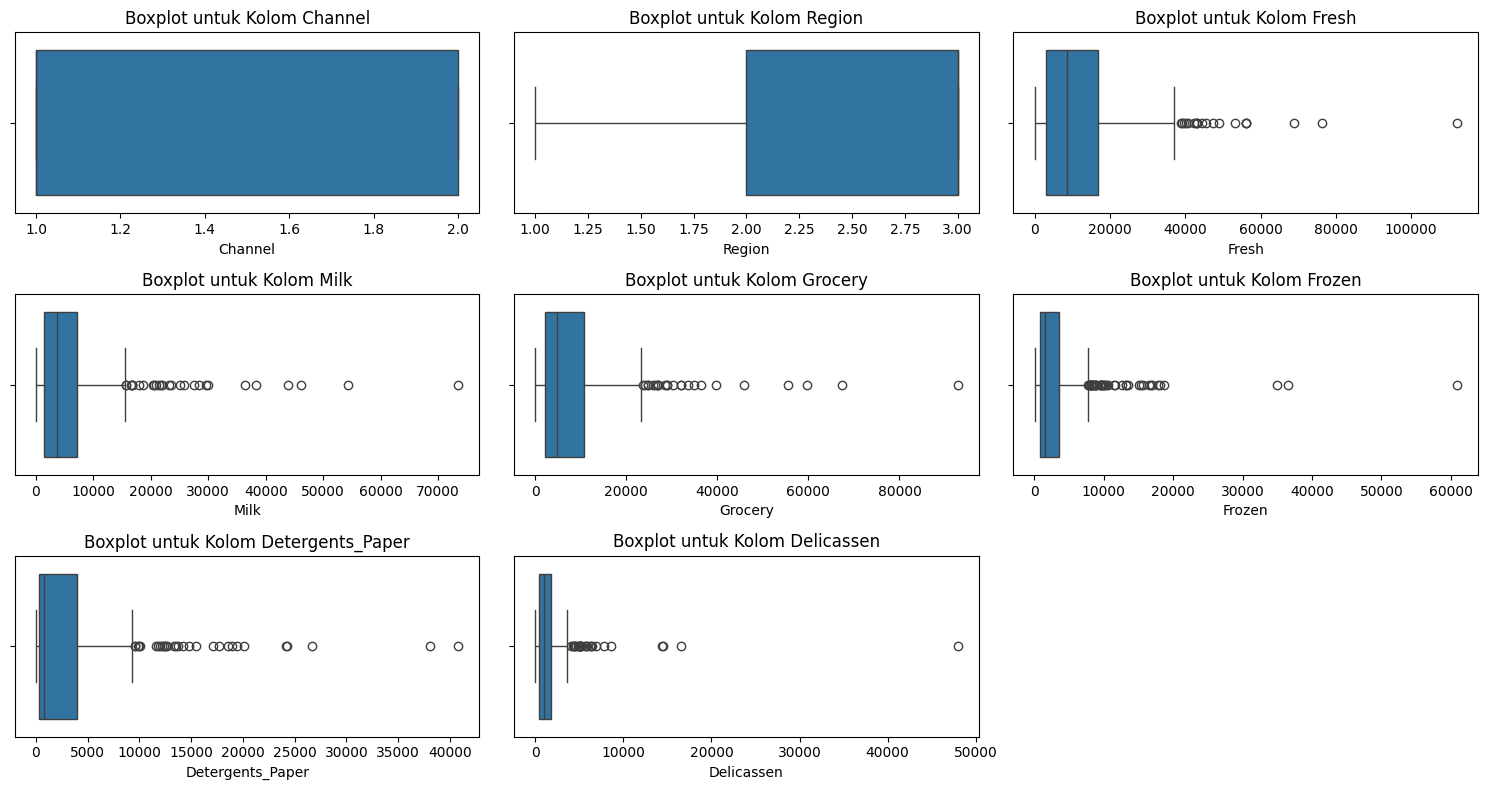

Outliers were successfully handled


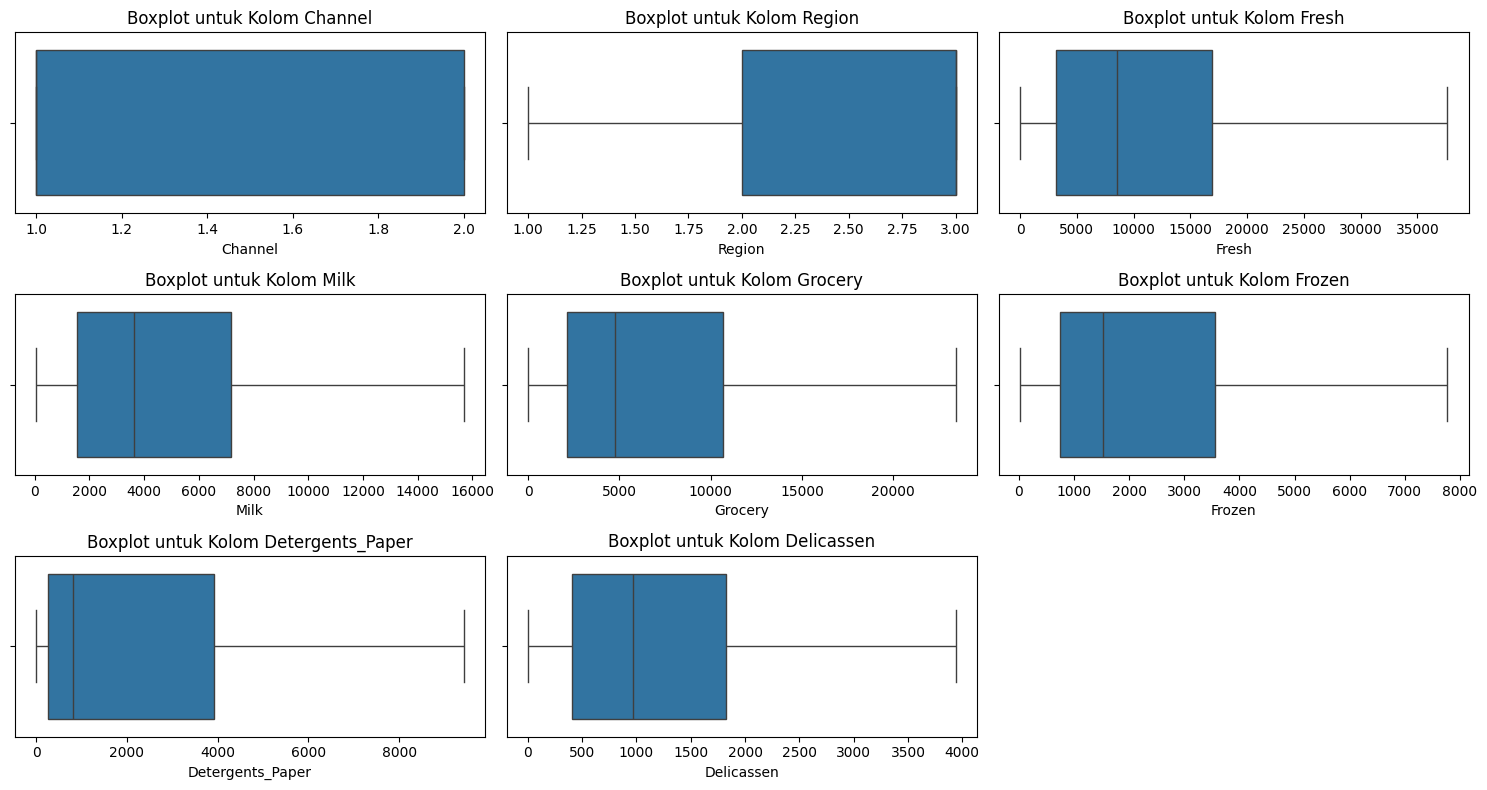


Size of X_train: (352, 7)
Size of X_test: (88, 7)
Size of Y_train: (352,)
Size of Y_test: (88,)


In [ ]:
dataset = pd.read_csv(url)

num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk Kolom {col}')
plt.tight_layout()
plt.show()

# metode IQR
def handle_outliers(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[column] = data[column].apply(lambda x: upper_bound
                                    if x > upper_bound
                                    else (lower_bound if x < lower_bound else x))
  return data

for col in dataset.select_dtypes(include=['int', 'float']).columns:
  dataset = handle_outliers(dataset, col)

print("Outliers were successfully handled")

num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk Kolom {col}')
plt.tight_layout()
plt.show()

# memisahkan fitur channel agar menjadi target
X = dataset.drop(columns=['Channel'])
Y = dataset['Channel']

from sklearn.model_selection import train_test_split

# Membagi dataset menjadi set pelatihan dan set pengujian
data_split_ratio = 0.2  # 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=data_split_ratio, random_state=42)

# Menampilkan ukuran setiap set
print("\nSize of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of Y_train:", y_train.shape)
print("Size of Y_test:", y_test.shape)

# Init MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data pelatihan dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan transformasi data uji menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Konversi data yang telah diskalakan kembali ke datafrme untuk memudahkan pembacaan
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Analisis boxplot:

1. Channel dan Region terlihat sebagai fitur kategorikal yang tidak memiliki outliers yang terlihat. Distribusi data untuk fitur-fitur ini cukup sederhana, tanpa variasi yang signifikan.
2. Fitur Fresh menunjukkan adanya banyak outliers, dengan beberapa nilai yang sangat tinggi (di atas 40,000 dan bahkan mendekati 100,000). Median dari fitur ini berada sekitar 8,000.
Interquartile Range (IQR) untuk Fresh cukup lebar, menunjukkan variasi yang besar dalam data pembelian Fresh.
3. Fitur Milk juga memiliki banyak outliers, dengan beberapa nilai yang sangat tinggi (di atas 20,000). Median untuk Milk berada di sekitar 3,750.
Distribusi untuk Milk menunjukkan bahwa sebagian besar data berada di bawah 10,000 dengan beberapa outliers yang sangat besar.
4. Fitur Grocery memiliki beberapa outliers yang sangat tinggi, dengan nilai mendekati 40,000. Median dari fitur ini berada di sekitar 3,000.
Seperti Milk, Grocery memiliki distribusi data yang menunjukkan sebagian besar data berada di bawah 10,000 dengan beberapa outliers yang sangat besar.
5. Fitur Frozen memiliki banyak outliers, dengan nilai yang mencapai 20,000. Median untuk Frozen berada di sekitar 1,200.
Distribusi untuk Frozen lebih sempit dibandingkan dengan Fresh, Milk, dan Grocery, namun tetap memiliki banyak outliers.
6. Fitur Detergents_Paper memiliki beberapa outliers yang cukup tinggi, dengan nilai mendekati 20,000. Median dari fitur ini berada di sekitar 800.
Distribusi data untuk Detergents_Paper cukup sempit, namun terdapat beberapa outliers yang sangat signifikan.
7. Fitur Delicassen memiliki beberapa outliers, dengan nilai mendekati 20,000. Median untuk Delicassen berada di sekitar 965.
Distribusi untuk Delicassen menunjukkan sebagian besar data berada di bawah 5,000 dengan beberapa outliers yang sangat besar.

## Metode KNN

---

Accuracy setelah outlier dihapus lebih kecil dibandingkan sebelum dihapus, ini artinya outlier mungkin mengandung informasi yang penting yang membantu model dalam belajar. Dalam beberapa kasus, outlier dapat merepresentasikan variasi alami dalam data yang seharusnya dipertimbangkan, bukan dihapus.


              precision    recall  f1-score   support

           1       0.97      0.89      0.93        65
           2       0.75      0.91      0.82        23

    accuracy                           0.90        88
   macro avg       0.86      0.90      0.88        88
weighted avg       0.91      0.90      0.90        88



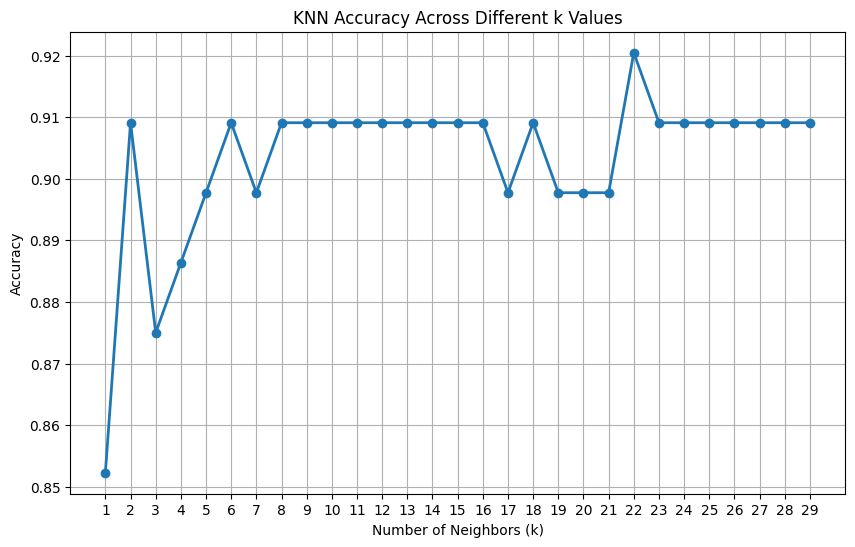

Training Accuracy (k=22): 0.9119318181818182
Testing Accuracy (k=22): 0.9204545454545454


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize the model
knn.fit(X_train_scaled, y_train)  # Train the model

y_pred = knn.predict(X_test_scaled)  # Predict the test set
default_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
default_classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print(default_classification_rep)

accuracies = []  # Store accuracy for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_scaled, y_train)  # Train the model
    y_pred = knn.predict(X_test_scaled)  # Predict on the test set
    accuracies.append(accuracy_score(y_test, y_pred))  # Calculate and store accuracy

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Across Different k Values')
plt.grid(True)
plt.xticks(k_values)
plt.show()

optimal_k = 22
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)  # Initialize KNN with k=18
knn_optimal.fit(X_train_scaled, y_train)  # Train the model

y_train_pred = knn_optimal.predict(X_train_scaled)  # Predict on the training set
y_test_pred = knn_optimal.predict(X_test_scaled)  # Predict on the test set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)  # Testing accuracy

# Final results
print("Training Accuracy (k=22):", train_accuracy)
print("Testing Accuracy (k=22):", test_accuracy)

## Metode Naive Bayes

---

Accuracy setelah outlier dihapus lebih kecil dibandingkan sebelum dihapus, ini artinya outlier mungkin mengandung informasi yang penting yang membantu model dalam belajar. Dalam beberapa kasus, outlier dapat merepresentasikan variasi alami dalam data yang seharusnya dipertimbangkan, bukan dihapus.

In [ ]:
nb = GaussianNB()  # Initialize the Gaussian Naive Bayes model
nb.fit(X_train_scaled, y_train)  # Train the model

# Step 6: Predict and evaluate the model with test data
y_pred = nb.predict(X_test_scaled)  # Predict the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

# Print evaluation results
print("\nAccuracy of Naive Bayes:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 8: Training and testing accuracy for Naive Bayes
y_train_pred = nb.predict(X_train_scaled)  # Predict on the training set
y_test_pred = nb.predict(X_test_scaled)  # Predict on the test set
train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)  # Testing accuracy

# Final results
print("Training Accuracy (Naive Bayes):", train_accuracy)
print("Testing Accuracy (Naive Bayes):", test_accuracy)


Accuracy of Naive Bayes: 0.8977272727272727

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        65
           2       0.77      0.87      0.82        23

    accuracy                           0.90        88
   macro avg       0.86      0.89      0.87        88
weighted avg       0.90      0.90      0.90        88


Confusion Matrix:
[[59  6]
 [ 3 20]]
Training Accuracy (Naive Bayes): 0.8920454545454546
Testing Accuracy (Naive Bayes): 0.8977272727272727


# **Kesimpulan**

Berdasarkan tahapan analisis pada dataset  "Wholesale customers" dengan 7 variabel-variabel feature yang ada, terdapat dua metode klasifikasi yang kami gunakan, yaitu K-Nearest Neighbors(KNN) dan Naive Bayes. Kami mencoba membandingkan beberapa setting untuk kedua metode tersebut, yaitu: sebelum menghapus outlier, setelah tuning parameter,dan setelah menghapus outlier.

Berikut merupakan rincian analisis yang dapat diambil dari percobaan pada dataset ini:
1. **Metode KNN**
- Sebelum dilakukan penghapusan outlier dan tuning parameter, kami menggunakan nilai k=4 (didapatkan berdasarkan grafik trend accuracy di setiap nilai k) dengan accuracy bernilai: Training Accuracy (k=4): **0.9375**; Testing Accuracy (k=4): **0.9318181818181818**. Kedua akurasi (training dan testing) menunjukkan nilai yang tinggi, yang menunjukkan bahwa model KNN ini mampu melakukan klasifikasi dengan baik pada data pelatihan dan data pengujian.
Selain itu, perbedaan antara training accuracy dan testing accuracy sangat kecil (hanya sekitar 0.0057) menunjukkan bahwa model tidak mengalami overfitting, di mana model terlalu baik pada data pelatihan tetapi buruk pada data pengujian. Sebaliknya, model ini tampaknya dapat menggeneralisasi dengan baik ke data yang belum pernah dilihat sebelumnya.

- Setelah dilakukan tuning parameter menggunakan Cross-Validation, kami mendapatkan accuracy bernilai: Training Accuracy: **0.9176**; Testing Accuracy: **0.8864**. Accuracy menurun dari sebelum dilakukan tuning, menunjukkan bahwa tuning parameter yang dilakukan mungkin tidak efektif atau tidak sesuai untuk model atau dataset yang digunakan.

- Setelah dilakukan penghapusan outlier, kami menggunakan nilai k=22 (didapatkan berdasarkan grafik trend accuracy di setiap nilai k) dengan accuracy bernilai: Training Accuracy (k=22): **0.9119318181818182**;
Testing Accuracy (k=22): **0.9204545454545454**. Accuracy setelah outlier dihapus lebih kecil dibandingkan sebelum dihapus, ini artinya outlier mungkin mengandung informasi yang penting yang membantu model dalam belajar. Dalam beberapa kasus, outlier dapat merepresentasikan variasi alami dalam data yang seharusnya dipertimbangkan, bukan dihapu

2. **Metode Naive Bayes**
- Sebelum dilakukan penghapusan outlier dan tuning parameter, accuracy bernilai: Training Accuracy (Naive Bayes): **0.8977272727272727**;
Testing Accuracy (Naive Bayes): **0.9090909090909091**. Kedua akurasi (training dan testing) menunjukkan nilai yang cukup baik, dengan testing accuracy (0.9091) sedikit lebih tinggi daripada training accuracy (0.8977). Ini menunjukkan bahwa model Naive Bayes mampu melakukan klasifikasi dengan baik pada data pelatihan dan data pengujian. Testing accuracy yang lebih tinggi daripada training accuracy bisa menjadi indikasi bahwa model tidak mengalami overfitting. Sebaliknya, model mungkin lebih baik dalam menggeneralisasi ke data yang belum pernah dilihat sebelumnya, meskipun perbedaan antara keduanya tidak terlalu besar.
- Setelah dilakukan tuning parameter menggunakan Var Smoothing, accuracy tidak berubah. Artinya model mungkin sudah berada pada titik optimal dalam hal kompleksitas dan generalisasi. Tuning parameter tidak memberikan perubahan signifikan karena model sudah cukup baik dalam menangkap pola dalam data.
- Setelah dilakukan penghapusan outlier, accuracy bernilai Training Accuracy (Naive Bayes): **0.8920454545454546**; Testing Accuracy (Naive Bayes): **0.8977272727272727**. Accuracy setelah outlier dihapus lebih kecil dibandingkan sebelum dihapus, ini artinya outlier mungkin mengandung informasi yang penting yang membantu model dalam belajar. Dalam beberapa kasus, outlier dapat merepresentasikan variasi alami dalam data yang seharusnya dipertimbangkan, bukan dihapus.

3. **Perbandingan Kedua Metode**
- KNN menunjukkan performa yang lebih baik dibandingkan Naive Bayes dalam hal akurasi, baik sebelum maupun setelah penghapusan outlier. KNN lebih sensitif terhadap pengaruh outlier, dan penghapusan outlier tampaknya mengurangi akurasi model.
- Naive Bayes memiliki akurasi yang lebih rendah secara keseluruhan, tetapi menunjukkan stabilitas yang lebih baik setelah tuning parameter, dengan tidak adanya perubahan signifikan dalam akurasi.
- Kedua metode menunjukkan bahwa outlier dapat mengandung informasi penting yang berkontribusi pada kinerja model, dan penghapusan outlier tidak selalu merupakan langkah yang tepat.


# Deploy Model via Streamlit


## Langkah 1: Buat Script untuk Melatih dan Menyimpan Model Final

In [ ]:
# Membuat dan Menjalankan Script Pelatihan

# Tulis isi script ke file train_model.py
%%writefile train_model.py

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle

print("Starting model training process...")

# 1. Load Data
url = 'https://raw.githubusercontent.com/hyejrkv/datasetWholesaleCustomers/refs/heads/main/Wholesale%20customers%20data.csv'
dataset = pd.read_csv(url)
print("Data loaded successfully.")

# 2. Preprocessing
X = dataset.drop(columns=['Channel', 'Delicassen'])
Y = dataset['Channel']

# 3. Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Data has been scaled.")

# 4. Train the Final Model
best_params_knn = {
    'metric': 'manhattan',
    'n_neighbors': 11,
    'weights': 'uniform'
}
final_model = KNeighborsClassifier(**best_params_knn)
final_model.fit(X_scaled, Y)
print("Final model trained successfully.")

# 5. Save the Model and the Scaler
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)
print("Model saved to knn_model.pkl")

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print("Scaler saved to scaler.pkl")

print("\nProcess complete.")

# Jalankan script yang baru saja kita buat
!python train_model.py

Writing train_model.py


## Langkah 2: Buat Script Aplikasi Streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Membuat file aplikasi Streamlit
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Fungsi untuk memuat model dan scaler
@st.cache_resource
def load_artifacts():
    try:
        with open('knn_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)
        with open('scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
        return model, scaler
    except FileNotFoundError:
        st.error("Model atau scaler tidak ditemukan. Harap jalankan sel training terlebih dahulu.")
        return None, None

# Muat model dan scaler
model, scaler = load_artifacts()

# Tampilan UI Streamlit
st.set_page_config(page_title="Prediksi Channel Pelanggan", layout="wide")
st.title("📊 Prediksi Channel Pelanggan Grosir (KNN)")
st.write("Aplikasi ini memprediksi channel pelanggan (Horeca atau Retail) berdasarkan pengeluaran tahunan mereka pada berbagai kategori produk.")

st.sidebar.header("Masukkan Data Pelanggan:")

# Buat input form di sidebar
def user_input_features():
    region = st.sidebar.selectbox('Region', [1, 2, 3], help="1=Lisbon, 2=Oporto, 3=Other")
    fresh = st.sidebar.number_input('Fresh Products', min_value=0, value=12000, step=100)
    milk = st.sidebar.number_input('Milk Products', min_value=0, value=5000, step=100)
    grocery = st.sidebar.number_input('Grocery Products', min_value=0, value=7000, step=100)
    frozen = st.sidebar.number_input('Frozen Products', min_value=0, value=3000, step=100)
    detergents_paper = st.sidebar.number_input('Detergents & Paper', min_value=0, value=2000, step=100)

    data = {
        'Region': region,
        'Fresh': fresh,
        'Milk': milk,
        'Grocery': grocery,
        'Frozen': frozen,
        'Detergents_Paper': detergents_paper
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Tampilkan data input pengguna
st.subheader("Data yang Anda Masukkan:")
st.dataframe(input_df, use_container_width=True)

# Tombol prediksi
if st.button('Prediksi Channel'):
    if model is not None and scaler is not None:
        # Scaling input pengguna
        input_scaled = scaler.transform(input_df)

        # Lakukan prediksi
        prediction = model.predict(input_scaled)
        prediction_proba = model.predict_proba(input_scaled)

        # Tampilkan hasil
        st.subheader("Hasil Prediksi:")
        channel_map = {1: 'Horeca (Hotel/Restaurant/Cafe)', 2: 'Retail'}
        predicted_channel = channel_map[prediction[0]]

        col1, col2 = st.columns(2)
        with col1:
            st.metric("Channel Terprediksi", predicted_channel)
        with col2:
            st.metric("Kepercayaan (Confidence)", f"{prediction_proba.max():.2%}")

        st.success(f"Berdasarkan data yang dimasukkan, pelanggan ini kemungkinan besar termasuk dalam channel **{predicted_channel}**.")
    else:
        st.warning("Tidak dapat melakukan prediksi karena model belum dimuat.")

st.markdown("---")
st.write("Dibuat oleh Kelompok 1M2W: Riodino Raihan, Nurul Izzah, Awanda Puspa")

Writing app.py


# Menjalankan aplikasi

In [ ]:
!pip install pyngrok

In [ ]:
# Menjalankan aplikasi dan membuat tunnel publik
from pyngrok import ngrok

# Matikan proses ngrok yang mungkin sudah berjalan sebelumnya
ngrok.kill()

# Masukkan authtoken ngrok Anda. Anda bisa mendapatkannya dari dashboard ngrok.
# Ganti 'YOUR_NGROK_AUTHTOKEN' dengan token Anda.
# Ini adalah langkah penting agar tunnel Anda stabil.
NGROK_AUTH_TOKEN = "token_pribadi"  # <-- GANTI DENGAN TOKEN PRIBADI
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Jalankan streamlit di background
!nohup streamlit run app.py &

# Buka tunnel ke port 8501 (port default streamlit)
public_url = ngrok.connect(8501)
print(f"🔗 Aplikasi Streamlit Anda sudah live di: {public_url}")

nohup: appending output to 'nohup.out'
🔗 Aplikasi Streamlit Anda sudah live di: NgrokTunnel: "https://ab988ef0bb16.ngrok-free.app" -> "http://localhost:8501"
